In [1]:
import numpy as np
from scipy.special import erfc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#a)
mapping_table = [-3-3j, -3-1j, -3+3j, -3+1j, -1-3j, -1-1j, -1+3j, -1+1j, 3-3j, 3-1j, 3+3j, 3+1j, 1-3j, 1-1j, 1+3j, 1+1j]

def mod(bits):
    label = np.zeros((len(bits),1))
    symbols = np.zeros((len(bits),),dtype=complex)
    for i in range(0,len(bits)): 
        symbols[i] = mapping_table[bits[i]]/np.sqrt(10)
        label[i,0] = bits[i]
    return symbols, label

# Generate N 4-bit symbols.
N = 100000

knc = KNeighborsClassifier()
parameters = {'n_neighbors' :[1, 2, 3, 4, 5, 10, 15, 20], 'weights':['uniform', 'distance']}
print(parameters)
clf = KNeighborsClassifier(5, weights='distance')

#lab_enc = preprocessing.LabelEncoder()

# Create Es/N0 vector.
EsN0dB = np.arange(0,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

for idx in range(0,len(EsN0dB)):
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    
    bits = np.random.randint(0,16,N)

    # Modulate the binary stream into 16QAM symbols.
    ip, label = mod(bits)

    ip = ip.reshape((len(ip),1))
    
    # Generate noise vector with unitary variance.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
    # Pass symbols through AWGN channel.
    y = ip + np.sqrt(EsN0Lin)*noise
    
    y_re = y.real
    y_im = y.imag
    y = np.concatenate((y_re, y_im), axis=1)
    label = label.ravel()
    
    sym_train , sym_test, label_train, label_test = train_test_split (y, label, test_size=0.2, random_state=42)
    
    clf.fit(sym_train, label_train)
    
    # Prediction for real part.
    symb_detected = clf.predict(sym_test)

    # Simulated 16-QAM BER.
    error_symb = (label_test.reshape(len(label_test), 1)[:,0] != symb_detected.reshape(len(symb_detected), 1)[:,0])

    error = 0
    for i in range(len(error_symb)): 
        if(error_symb[i]==True): 
            error += 1
    
    ser_simu[idx] = 1.0 * error / N
    
    # Theoretical 16-QAM BER.
    M = 4
    k = np.sqrt(3/(2*(M-1))) 
    ser_theo[idx] = 2*(1-1/np.sqrt(M))*erfc(k*np.sqrt((10.0**(EsN0dB[idx]/10.0)))) - (1-(2/np.sqrt(M))+1/M)*(erfc(k*np.sqrt((10.0**(EsN0dB[idx]/10.0))))**2.0)

{'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20], 'weights': ['uniform', 'distance']}


b) logaritmo
Es/N0:0 	- BER: 1.632000e-01
Es/N0:2 	- BER: 1.510000e-01
Es/N0:4 	- BER: 1.349800e-01
Es/N0:6 	- BER: 1.137500e-01
Es/N0:8 	- BER: 8.444000e-02
Es/N0:10 	- BER: 5.323000e-02
Es/N0:12 	- BER: 2.558000e-02
Es/N0:14 	- BER: 9.400000e-03
Es/N0:16 	- BER: 1.800000e-03
Es/N0:18 	- BER: 1.200000e-04
Es/N0:20 	- BER: 1.000000e-05


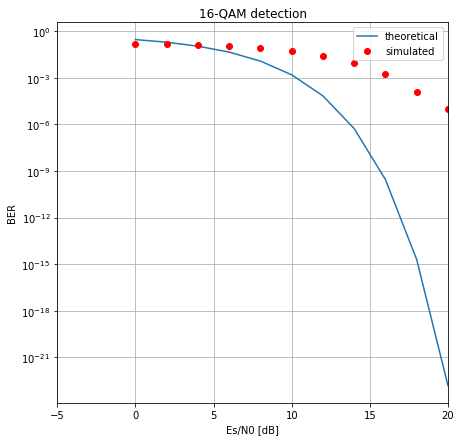

In [4]:
print('b) logaritmo')
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ser_simu[i]))

# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('16-QAM detection')
plt.legend()
plt.xlim([-5, 20])
plt.show()

b)
Es/N0:0 	- BER: 1.632000e-01
Es/N0:2 	- BER: 1.510000e-01
Es/N0:4 	- BER: 1.349800e-01
Es/N0:6 	- BER: 1.137500e-01
Es/N0:8 	- BER: 8.444000e-02
Es/N0:10 	- BER: 5.323000e-02
Es/N0:12 	- BER: 2.558000e-02
Es/N0:14 	- BER: 9.400000e-03
Es/N0:16 	- BER: 1.800000e-03
Es/N0:18 	- BER: 1.200000e-04
Es/N0:20 	- BER: 1.000000e-05


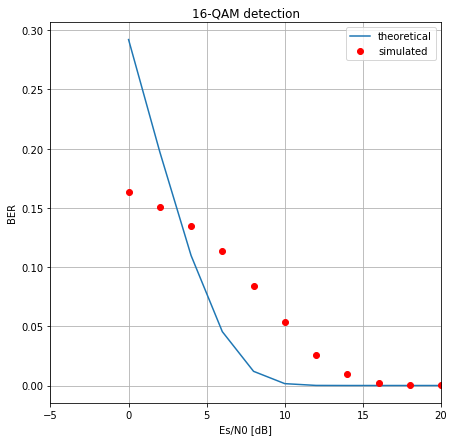

In [5]:
print('b)')
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- BER: %e' % (EsN0dB[i], ser_simu[i]))

# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
#plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('BER')
plt.grid(True)
plt.title('16-QAM detection')
plt.legend()
plt.xlim([-5, 20])
plt.show()

## c) A curva simulada se apoxima só um poco da curva teórica da SER (algumas partes) mas em geral nao se aproxima a curva teórica